# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '.'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

## EX1:

In [23]:
app_train['Group_DAYS_BIRTH']= pd.cut(app_train["DAYS_BIRTH"]/(365), bins=10)
app_train['Group_DAYS_BIRTH'].value_counts()


(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: Group_DAYS_BIRTH, dtype: int64

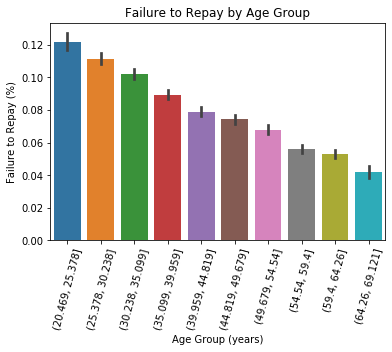

In [24]:
import seaborn as sns

px = app_train['Group_DAYS_BIRTH']
py = app_train['TARGET']
sns.barplot(px, py)


plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

## EX2:

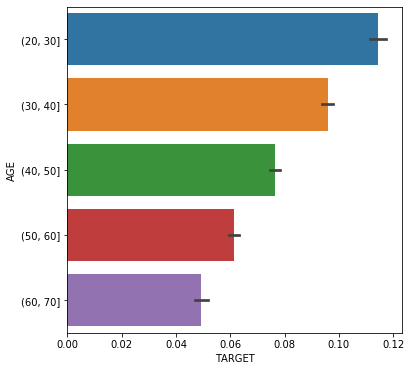

In [21]:
# 將出生天數轉換成年齡
app_train['AGE'] = app_train['DAYS_BIRTH'] / 365

cut_rule = [x * 10 for x in range(2,8)]
age_group = pd.cut(app_train['AGE'], bins= cut_rule)

y = age_group.apply(str)
x = app_train['TARGET']
#sns.barplot(px, py)
plt.figure(figsize=(6,6))
sns.barplot(x, y)

#plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
#plt.title('Failure to Repay by Age Group');

## EX3:

In [25]:
app_train["equal_width_age"] =  pd.cut(app_train["DAYS_BIRTH"]/365, 4, include_lowest=False)
app_train["equal_width_age"].value_counts()

(32.668, 44.819]    100808
(44.819, 56.97]      84685
(20.469, 32.668]     66536
(56.97, 69.121]      55482
Name: equal_width_age, dtype: int64

In [26]:
app_train["EMPLOYED_Years"] =  pd.cut(abs(app_train["DAYS_EMPLOYED"])/365, 4, include_lowest=False)
app_train["EMPLOYED_Years"].value_counts()

(-0.0491, 12.268]    215921
(12.268, 24.537]      29536
(24.537, 36.805]       6031
(36.805, 49.074]        649
Name: EMPLOYED_Years, dtype: int64

In [27]:
app_train['AMT_INCOME_TOTAL'].value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
315000.0     5862
247500.0     5344
126000.0     4668
360000.0     4115
121500.0     3848
99000.0      3633
292500.0     3418
103500.0     3330
76500.0      3146
144000.0     3123
171000.0     2647
450000.0     2435
117000.0     2390
54000.0      2319
72000.0      2187
166500.0     2053
45000.0      2043
108000.0     1946
337500.0     1790
94500.0      1747
            ...  
100300.5        1
200794.5        1
100476.0        1
200961.0        1
200997.0        1
100507.5        1
100516.5        1
50274.0         1
201127.5        1
100566.0        1
402376.5        1
100629.0        1
201267.0        1
50323.5         1
201361.5        1
100786.5        1
201658.5        1
100854.0        1
245046.6        1
201811.5        1
403650.0        1
100944.0        1
58950.0         1
101083.5        1
404406.0  

In [28]:
grp = ['EMPLOYED_Years','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

EMPLOYED_Years     TARGET
(-0.0491, 12.268]  0         175463.022850
                   1         170028.925871
(12.268, 24.537]   0         185223.518102
                   1         167774.414851
(24.537, 36.805]   0         168993.011784
                   1         159700.840336
(36.805, 49.074]   0         179272.005469
                   1         147500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [29]:
label = ['0_Child', '1-2_Child', '3-5_Child', '>5_Child']
cut_rule = [min(app_train.CNT_CHILDREN)-1,min(app_train.CNT_CHILDREN),2,5,max(app_train.CNT_CHILDREN)]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True,labels=label)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0_Child      215371
1-2_Child     87868
3-5_Child      4230
>5_Child         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [30]:
grp = ['EMPLOYED_Years','TARGET','CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

EMPLOYED_Years     TARGET  CNT_CHILDREN_GROUP
(-0.0491, 12.268]  0       0_Child               176525.717816
                           1-2_Child             173684.470083
                           3-5_Child             173149.302521
                           >5_Child              143833.333333
                   1       0_Child               165844.362800
                           1-2_Child             177983.681187
                           3-5_Child             159044.837209
                           >5_Child              180000.000000
(12.268, 24.537]   0       0_Child               184421.589677
                           1-2_Child             186600.452945
                           3-5_Child             192169.297718
                           >5_Child              140250.000000
                   1       0_Child               170094.410857
                           1-2_Child             161455.165289
                           3-5_Child             195966.000000
         

In [31]:
grp = ['EMPLOYED_Years']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

EMPLOYED_Years
(-0.0491, 12.268]    174957.844434
(12.268, 24.537]     184328.495370
(24.537, 36.805]     168626.316907
(36.805, 49.074]     178831.407550
Name: AMT_INCOME_TOTAL, dtype: float64

Text(0, 0.5, 'TARGET Dense')

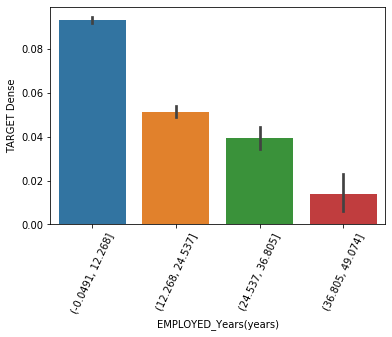

In [32]:
import seaborn as sns # 另一個繪圖-樣式套件
px = app_train.EMPLOYED_Years
py = app_train.TARGET
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 65); plt.xlabel('EMPLOYED_Years(years)'); plt.ylabel('TARGET Dense')

Text(0, 0.5, 'TARGET Dense')

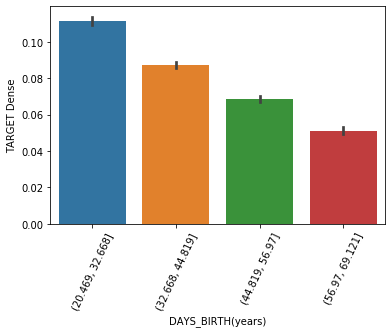

In [33]:
px = app_train.equal_width_age
py = app_train.TARGET
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 65); plt.xlabel('DAYS_BIRTH(years)'); plt.ylabel('TARGET Dense')